# Resilience study

## Enviroment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Data loading and first exploration

In [2]:
# load and shape
covid_dataset_w1tow4 = pd.read_spss('../W1W2W3W4_RESILIENCIA.sav')
print(f'covid_dataset_w1tow4 has {covid_dataset_w1tow4.shape[0]} rows and {covid_dataset_w1tow4.shape[1]} columns')

covid_dataset_w1tow4 has 1951 rows and 2139 columns


In [3]:
# first glance
covid_dataset_w1tow4.head()

ID  W1_CODIGO_ID  W2_CODIGO_ID  W3_CODIGO_ID  W4_CODIGO_ID  \
0  1020597.0     1020597.0           NaN           NaN           NaN   
1   106149.0      106149.0           NaN           NaN           NaN   
2  1077997.0     1077997.0           NaN           NaN           NaN   
3  1181910.0     1181910.0           NaN           NaN           NaN   
4  1469056.0     1469056.0           NaN           NaN           NaN   

         W1_ID        W2_ID        W3_ID        W4_ID   WAVES  TIEMPO_MINUTOS  \
0  si tiene w1  no tiene w2  no tiene w3  no tiene w4  1000.0       53.766667   
1  si tiene w1  no tiene w2  no tiene w3  no tiene w4  1000.0       60.450000   
2  si tiene w1  no tiene w2  no tiene w3  no tiene w4  1000.0       32.783333   
3  si tiene w1  no tiene w2  no tiene w3  no tiene w4  1000.0       36.633333   
4  si tiene w1  no tiene w2  no tiene w3  no tiene w4  1000.0       22.600000   

                 GRUPO_DE_TIEMPO           StartDate             EndDate  \
0  Mayor o igual a 30,01 minutos 2020-04-11 15:01:17 2020-04-11 15:55:04   
1  Mayor o igual a 30,01 minutos 2020-04-13 03:45:43 2020-04-13 04:46:11   
2  Mayor o igual a 30,01 minutos 2020-04-08 09:20:42 2020-04-08 09:53:29   
3  Mayor o igual a 30,01 minutos 2020-04-08 02:45:49 2020-04-08 03:22:27   
4             De 20 a 30 minutos 2020-04-11 11:50:21 2020-04-11 12:12:58   

       Status      IPAddress  Progress  Duration__in_seconds_ Finished  \
0  IP Address    83.213.3.11     100.0                 3226.0     True   
1  IP Address  176.87.120.21     100.0                 3627.0     True   
2  IP Address   81.38.96.150     100.0                 1967.0     True   
3  IP Address  193.35.26.164     100.0                 2198.0     True   
4  IP Address  188.76.11.235     100.0                 1356.0     True   

         RecordedDate         ResponseId  Edad       Sexo Sexo_Otro  \
0 2020-04-11 15:55:05  R_2V7swMAdV8Ryp7g  47.0  Masculino             
1 2020-04-13 04:46:11  R_3MGtgNnM7UMPNfB  47.0   Femenino             
2 2020-04-08 09:53:30  R_1Flh5PMq072MXem  73.0  Masculino             
3 2020-04-08 03:22:27  R_305HqDroxxrRji4  49.0   Femenino             
4 2020-04-11 12:12:58  R_2uWzm9F1fjJjMIq  25.0   Femenino             

  Nacido_España Crecimiento_España Nacionalidad Zona_vivienda  \
0            Sí                 Sí      Español        Urbana   
1            Sí                 Sí     Española         Rural   
2            Sí                 Sí     Española         Rural   
3            Sí                 Sí     Española        Urbana   
4            Sí                 Sí     Española         Rural   

  Pertenencia_vecindario Comodidad_vencindario Comodida_vencindario  \
0          Moderadamente           Algo cómodo          Algo cómodo   
1            Ligeramente           Algo cómodo           Muy cómodo   
2                  Mucho            Muy cómodo           Muy cómodo   
3          Moderadamente            Muy cómodo           Muy cómodo   
4          Moderadamente           Algo cómodo          Algo cómodo   

  Codigo_postal             Titulación         Situación_laboral  \
0         48950  Formación profesional  Empleado tiempo completo   
1         30120           Licenciatura  Empleado tiempo completo   
2         06400              Doctorado                  Jubilado   
3         30510  Formación profesional  Empleado tiempo completo   
4         28890  Formación profesional     Empleado medio tiempo   

  Adultos_vivienda Menores_vivienda             Cuidado_menores  \
0                4                1  Uno o ambos progenitor(es)   
1                2                2  Uno o ambos progenitor(es)   
2                2                0                        Otro   
3                2                2  Uno o ambos progenitor(es)   
4                3                0                         NaN   

                          Descripción_lugar_vivienda  \
0  La estoy comprando con ayuda de una hipoteca o...   
1  La estoy compran

In [4]:
# column names, data types and non-null values
covid_dataset_w1tow4.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 2139 columns):
 #     Column                                                   Non-Null Count  Dtype         
---    ------                                                   --------------  -----         
 0     ID                                                       1951 non-null   float64       
 1     W1_CODIGO_ID                                             1951 non-null   float64       
 2     W2_CODIGO_ID                                             1628 non-null   float64       
 3     W3_CODIGO_ID                                             1330 non-null   float64       
 4     W4_CODIGO_ID                                             1499 non-null   float64       
 5     W1_ID                                                    1951 non-null   category      
 6     W2_ID                                                    1951 non-null   category      
 7     W3_ID                        

In [5]:
# convert IDs to str
covid_dataset_w1tow4['ID'] = covid_dataset_w1tow4['ID'].astype(int).astype(str)
covid_dataset_w1tow4['W1_CODIGO_ID'] = covid_dataset_w1tow4['W1_CODIGO_ID'].astype(int).astype(str)
covid_dataset_w1tow4['W2_CODIGO_ID'] = covid_dataset_w1tow4['W2_CODIGO_ID'].apply(lambda x: x
                                                                                  if pd.isnull(x) else str(int(x)))
covid_dataset_w1tow4['W3_CODIGO_ID'] = covid_dataset_w1tow4['W3_CODIGO_ID'].apply(lambda x: x
                                                                                  if pd.isnull(x) else str(int(x)))
covid_dataset_w1tow4['W4_CODIGO_ID'] = covid_dataset_w1tow4['W4_CODIGO_ID'].apply(lambda x: x
                                                                                  if pd.isnull(x) else str(int(x)))

In [6]:
# column names, data types and non-null values
covid_dataset_w1tow4.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1951 entries, 0 to 1950
Data columns (total 2139 columns):
 #     Column                                                   Non-Null Count  Dtype         
---    ------                                                   --------------  -----         
 0     ID                                                       1951 non-null   object        
 1     W1_CODIGO_ID                                             1951 non-null   object        
 2     W2_CODIGO_ID                                             1628 non-null   object        
 3     W3_CODIGO_ID                                             1330 non-null   object        
 4     W4_CODIGO_ID                                             1499 non-null   object        
 5     W1_ID                                                    1951 non-null   category      
 6     W2_ID                                                    1951 non-null   category      
 7     W3_ID                        

In [7]:
# unique values for categorical columns
covid_dataset_w1tow4.nunique()

ID                                                         1951
W1_CODIGO_ID                                               1951
W2_CODIGO_ID                                               1628
W3_CODIGO_ID                                               1330
W4_CODIGO_ID                                               1499
W1_ID                                                         1
W2_ID                                                         2
W3_ID                                                         2
W4_ID                                                         2
WAVES                                                         6
TIEMPO_MINUTOS                                             1459
GRUPO_DE_TIEMPO                                               2
StartDate                                                  1916
EndDate                                                    1917
Status                                                        1
IPAddress                               

In [8]:
# descriptive statistics for numerical columns
covid_dataset_w1tow4.describe()

WAVES  TIEMPO_MINUTOS  Progress  Duration__in_seconds_  \
count  1951.000000     1951.000000    1951.0            1951.000000   
mean   1091.029728       73.234572     100.0            4394.074321   
std      40.467463      241.679867       0.0           14500.792043   
min    1000.000000       20.083333     100.0            1205.000000   
25%    1100.000000       31.900000     100.0            1914.000000   
50%    1111.000000       40.633333     100.0            2438.000000   
75%    1111.000000       55.258333     100.0            3315.500000   
max    1111.000000     3875.916667     100.0          232555.000000   

              Edad  ANSIEDAD_POR_COVID  RIESGO_COVID_1  RIESGO_COVID_2  \
count  1951.000000         1951.000000     1951.000000     1951.000000   
mean     45.138391           58.460277       88.138903       22.684264   
std      12.812547           26.338299       14.705857       22.345877   
min       5.000000            0.000000        0.000000        0.000000   
25%      36.000000           40.000000       82.000000        7.000000   
50%      46.000000           63.000000       91.000000       14.000000   
75%      55.000000           80.000000      100.000000       31.000000   
max      75.000000          100.000000      100.000000      100.000000   

       RIESGO_COVID_3  RIESGO_COVID_4  MUERTE_POR_COVID_1  MUERTE_POR_COVID_2  \
count     1951.000000     1951.000000         1951.000000         1951.000000   
mean        84.326499       45.432086           81.577140           13.041005   
std         17.284661       26.210242           19.638687           17.342829   
min          0.000000        0.000000            0.000000            0.000000   
25%         78.000000       21.000000           79.000000            2.000000   
50%         90.000000       50.000000           87.000000            6.000000   
75%        100.000000       63.000000           94.000000           16.000000   
max        100.000000      100.000000          100.000000          100.000000   

       MUERTE_POR_COVID_3  MUERTE_POR_COVID_4  RIESGO_1MES  RIESGO_3MESES  \
count         1951.000000         1951.000000  1951.000000    1951.000000   
mean            75.001025           26.066632    42.372117      38.460789   
std             22.418079           23.598667    27.540402      24.876894   
min              0.000000            0.000000     0.000000       0.000000   
25%             65.000000            7.000000    19.000000      18.000000   
50%             80.000000           18.000000    47.000000      39.000000   
75%             91.000000           43.000000    60.000000      55.000000   
max            100.000000          100.000000   100.000000     100.000000   

       RIESGO_6MESES  streetcount  supercount  flatscount    amacount  \
count    1951.000000   880.000000  361.000000  814.000000  958.000000   
mean       35.844182     3.969318    2.789474    2.764128    1.722338   
std        28.837001     3.202348    2.576604    2.508218    1.716641   
min         0.000000     1.000000    1.000000    1.000000    1.000000   
25%        10.000000     1.000000    1.000000    1.000000    1.000000   
50%        30.000000     3.000000    2.000000    2.000000    1.000000   
75%        54.500000     5.000000    4.000000    4.000000    2.000000   
max       100.000000    10.000000   10.000000   10.000000   10.000000   

       BITS_STREET   BITS_SUPER   BITS_FLATS     BITS_AMA   rec_fiebre  \
count  1951.000000  1951.000000  1951.000000  1951.000000  1951.000000   
mean      2.717581     1.499744     2.127114     1.834444     0.977960   
std       2.719859     1.450685     2.011056     1.411587     0.146851   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       1.000000     1.000000     1.000000     1.000000     1.000000   
50%       1.000000     1.000000     1.000000     1.000000     1.000000   
75%       3.000000     1.000000     2.000000     2.000000     1.000000   
max      10.000000    10.000000 

In [9]:
# second glance
covid_dataset_w1tow4.head()

ID W1_CODIGO_ID W2_CODIGO_ID W3_CODIGO_ID W4_CODIGO_ID        W1_ID  \
0  1020597      1020597          NaN          NaN          NaN  si tiene w1   
1   106149       106149          NaN          NaN          NaN  si tiene w1   
2  1077997      1077997          NaN          NaN          NaN  si tiene w1   
3  1181910      1181910          NaN          NaN          NaN  si tiene w1   
4  1469056      1469056          NaN          NaN          NaN  si tiene w1   

         W2_ID        W3_ID        W4_ID   WAVES  TIEMPO_MINUTOS  \
0  no tiene w2  no tiene w3  no tiene w4  1000.0       53.766667   
1  no tiene w2  no tiene w3  no tiene w4  1000.0       60.450000   
2  no tiene w2  no tiene w3  no tiene w4  1000.0       32.783333   
3  no tiene w2  no tiene w3  no tiene w4  1000.0       36.633333   
4  no tiene w2  no tiene w3  no tiene w4  1000.0       22.600000   

                 GRUPO_DE_TIEMPO           StartDate             EndDate  \
0  Mayor o igual a 30,01 minutos 2020-04-11 15:01:17 2020-04-11 15:55:04   
1  Mayor o igual a 30,01 minutos 2020-04-13 03:45:43 2020-04-13 04:46:11   
2  Mayor o igual a 30,01 minutos 2020-04-08 09:20:42 2020-04-08 09:53:29   
3  Mayor o igual a 30,01 minutos 2020-04-08 02:45:49 2020-04-08 03:22:27   
4             De 20 a 30 minutos 2020-04-11 11:50:21 2020-04-11 12:12:58   

       Status      IPAddress  Progress  Duration__in_seconds_ Finished  \
0  IP Address    83.213.3.11     100.0                 3226.0     True   
1  IP Address  176.87.120.21     100.0                 3627.0     True   
2  IP Address   81.38.96.150     100.0                 1967.0     True   
3  IP Address  193.35.26.164     100.0                 2198.0     True   
4  IP Address  188.76.11.235     100.0                 1356.0     True   

         RecordedDate         ResponseId  Edad       Sexo Sexo_Otro  \
0 2020-04-11 15:55:05  R_2V7swMAdV8Ryp7g  47.0  Masculino             
1 2020-04-13 04:46:11  R_3MGtgNnM7UMPNfB  47.0   Femenino             
2 2020-04-08 09:53:30  R_1Flh5PMq072MXem  73.0  Masculino             
3 2020-04-08 03:22:27  R_305HqDroxxrRji4  49.0   Femenino             
4 2020-04-11 12:12:58  R_2uWzm9F1fjJjMIq  25.0   Femenino             

  Nacido_España Crecimiento_España Nacionalidad Zona_vivienda  \
0            Sí                 Sí      Español        Urbana   
1            Sí                 Sí     Española         Rural   
2            Sí                 Sí     Española         Rural   
3            Sí                 Sí     Española        Urbana   
4            Sí                 Sí     Española         Rural   

  Pertenencia_vecindario Comodidad_vencindario Comodida_vencindario  \
0          Moderadamente           Algo cómodo          Algo cómodo   
1            Ligeramente           Algo cómodo           Muy cómodo   
2                  Mucho            Muy cómodo           Muy cómodo   
3          Moderadamente            Muy cómodo           Muy cómodo   
4          Moderadamente           Algo cómodo          Algo cómodo   

  Codigo_postal             Titulación         Situación_laboral  \
0         48950  Formación profesional  Empleado tiempo completo   
1         30120           Licenciatura  Empleado tiempo completo   
2         06400              Doctorado                  Jubilado   
3         30510  Formación profesional  Empleado tiempo completo   
4         28890  Formación profesional     Empleado medio tiempo   

  Adultos_vivienda Menores_vivienda             Cuidado_menores  \
0                4                1  Uno o ambos progenitor(es)   
1                2                2  Uno o ambos progenitor(es)   
2                2                0                        Otro   
3                2                2  Uno o ambos progenitor(es)   
4                3                0                         NaN   

                          Descripción_lugar_vivienda  \
0  La estoy comprando con ayuda de una hipoteca o...   
1  La estoy comprando con ayuda de una hipoteca o... 

## Steps to data cleaning
- Drop irrelevant variables

Then, for each variable:
   - Categorical:
       - Class distribution to check for incorrect encoded answers
       - Evaluate if the variable is interesting enough as a possible predictor
       - Evaluate if it's possible to convert the variable, with possibly similar variables, to an index
       - We will be possibly doing target encoding, given the high number of variables
   - Observe distributions on numerical variables
       - Null values
       - Zero values
       - Logically inconsistent values
       - Outliers values
       - Duplicate values

In [10]:
# Drop irrelevant variables
covid_dataset_w1tow4.drop(['W1_ID',
                          'W2_ID',
                          'W3_ID',
                          'W4_ID',
                          'WAVES',
                          'TIEMPO_MINUTOS',
                          'GRUPO_DE_TIEMPO',
                          'StartDate',
                          'EndDate',
                          'Status',
                          'IPAddress',
                          'Progress',
                          'Duration__in_seconds_',
                          'Finished',
                          'RecordedDate',
                          'ResponseId'],
                         axis = 1,
                         inplace = True)

In [11]:
# function to apply basic eda to numeric variables
def eda_num(var):
    # describe
    print(var.describe())
    
    #nulls and zeros
    print(f'\nNulls: {var.isna().sum()} | Zeros: {(var == 0).sum()}')
    
    # histograma
    sns.histplot(var, bins = 15)
    
# function to apply basic eda to categorical 
def eda_cat(var):
    #nonnull values
    print(var.info(), '\n')
    
    # unique values
    print(var.value_counts())
    
    # bar chart
    sns.countplot(x = var)
    plt.xticks(rotation=90)

### ID

In [12]:
# update selected variables
dataset_selected = ['ID']
print(dataset_selected)

['ID']


### Edad

count    1951.000000
mean       45.138391
std        12.812547
min         5.000000
25%        36.000000
50%        46.000000
75%        55.000000
max        75.000000
Name: Edad, dtype: float64

Nulls: 0 | Zeros: 0


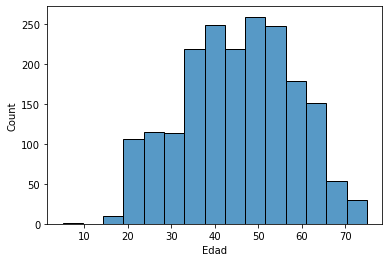

In [13]:
eda_num(covid_dataset_w1tow4['Edad'])

In [14]:
# update selected variables
dataset_selected.append('Edad')
print(dataset_selected)

# update filter
# reason: target population definition coherence (adults only)
dataset_filter = covid_dataset_w1tow4['Edad'] < 18
print(f'Filtro acumulado de {dataset_filter.sum()} registros')

['ID', 'Edad']
Filtro acumulado de 2 registros


### Sexo

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Sexo
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Masculino            1028
Femenino              918
Prefiero no decir       3
Otro                    1
Transgénero             1
Name: Sexo, dtype: int64


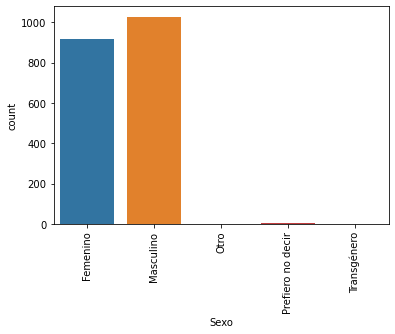

In [15]:
eda_cat(covid_dataset_w1tow4['Sexo'])

In [16]:
# update selected variables
dataset_selected.append('Sexo')
print(dataset_selected)

# update filter
# reason: very low count in categories different from 'Femenino' or 'Masculino'
dataset_filter = dataset_filter | ~(covid_dataset_w1tow4['Sexo'].isin(['Femenino', 'Masculino']))
print(f'Filtro acumulado de {dataset_filter.sum()} registros')

['ID', 'Edad', 'Sexo']
Filtro acumulado de 7 registros


### Nacido_España

Not selected because variable is not relevant for resilience (not a distinctive personal, psychological or health related variable).

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Nacido_España
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Sí    1814
No     137
Name: Nacido_España, dtype: int64


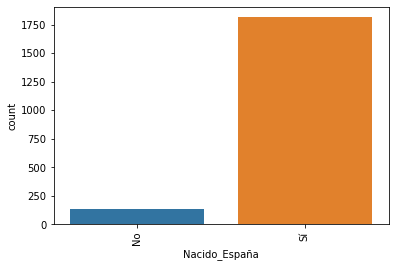

In [17]:
eda_cat(covid_dataset_w1tow4['Nacido_España'])

### Crecimiento_España

Not selected because variable is not relevant for resilience (not a distinctive personal, psychological or health related variable).

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Crecimiento_España
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Sí    1852
No      99
Name: Crecimiento_España, dtype: int64


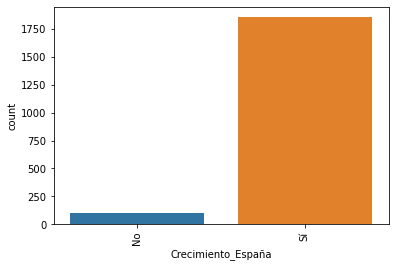

In [18]:
eda_cat(covid_dataset_w1tow4['Crecimiento_España'])

### Nacionalidad

Not selected because variable is not relevant for resilience (not a distinctive personal, psychological or health related variable).

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Nacionalidad
Non-Null Count  Dtype 
--------------  ----- 
1951 non-null   object
dtypes: object(1)
memory usage: 15.4+ KB
None 

Española                                                      1061
española                                                       399
Español                                                        133
ESPAÑOLA                                                       102
España                                                          39
español                                                         33
ESPAÑOL                                                         14
españa                                                          12
Argentina                                                        8
Rumana                                                           7
Espanola                                                         6
Italiana                                        

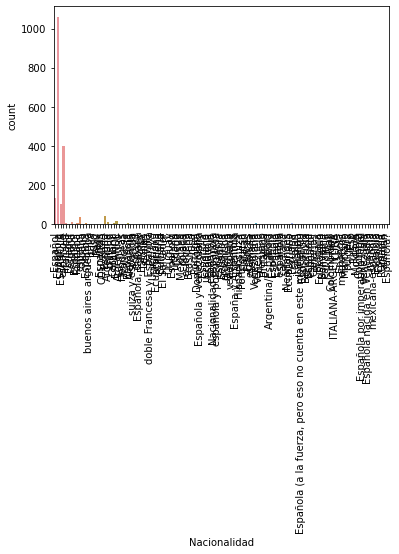

In [19]:
eda_cat(covid_dataset_w1tow4['Nacionalidad'])

### Zona_vivienda

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Zona_vivienda
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Urbana    1644
Rural      307
Name: Zona_vivienda, dtype: int64


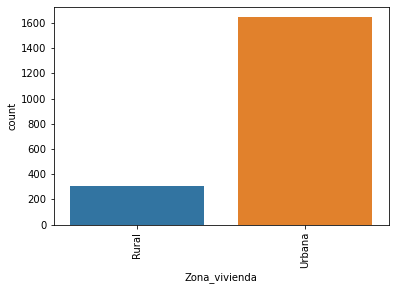

In [20]:
eda_cat(covid_dataset_w1tow4['Zona_vivienda'])

In [21]:
# update selected variables
dataset_selected.append('Zona_vivienda')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda']


### Pertenencia_vecindario

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Pertenencia_vecindario
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Moderadamente        798
Ligeramente          566
Mucho                493
Nada, en absoluto     94
Name: Pertenencia_vecindario, dtype: int64


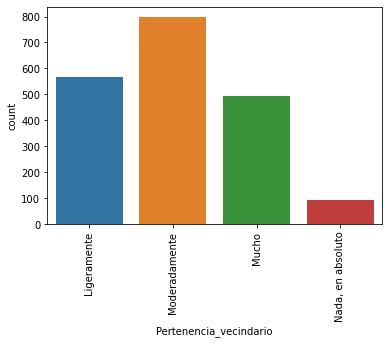

In [22]:
eda_cat(covid_dataset_w1tow4['Pertenencia_vecindario'])

In [23]:
# update selected variables
dataset_selected.append('Pertenencia_vecindario')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario']


### Comodidad_vencindario -> Comodidad_vencindario_llaves

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Comodidad_vencindario_llaves
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Algo incómodo    592
Algo cómodo      574
Muy incómodo     395
Muy cómodo       390
Name: Comodidad_vencindario_llaves, dtype: int64


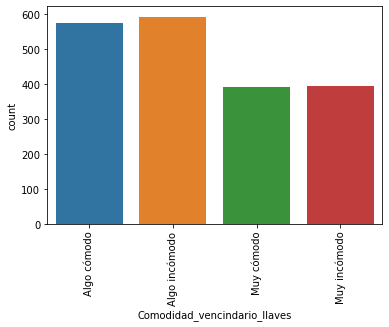

In [24]:
# rename Comodidad_vencindario -> Comodidad_vencindario_llaves
covid_dataset_w1tow4.rename(columns={"Comodidad_vencindario": "Comodidad_vencindario_llaves"}, inplace=True)

eda_cat(covid_dataset_w1tow4['Comodidad_vencindario_llaves'])

In [25]:
# update selected variables
dataset_selected.append('Comodidad_vencindario_llaves')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves']


### Comodida_vencindario -> Comodidad_vencindario_compra

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Comodidad_vencindario_compra
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Algo incómodo    641
Algo cómodo      632
Muy cómodo       422
Muy incómodo     256
Name: Comodidad_vencindario_compra, dtype: int64


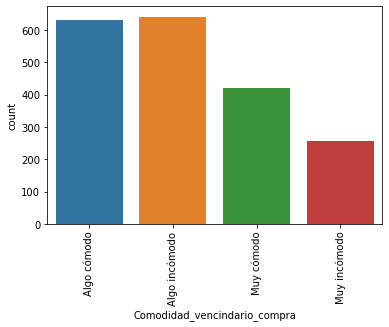

In [26]:
# rename Comodida_vencindario -> Comodidad_vencindario_compra
covid_dataset_w1tow4.rename(columns={"Comodida_vencindario": "Comodidad_vencindario_compra"}, inplace=True)

eda_cat(covid_dataset_w1tow4['Comodidad_vencindario_compra'])

In [27]:
# update selected variables
dataset_selected.append('Comodidad_vencindario_compra')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra']


### Titulación

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Titulación
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.4 KB
None 

Bachillerato             441
Licenciatura             364
Grado universitario      360
Formación profesional    292
Master                   192
Educación secundaria     181
Doctorado                 60
Educación primaria        55
No poseo titulación        6
Name: Titulación, dtype: int64


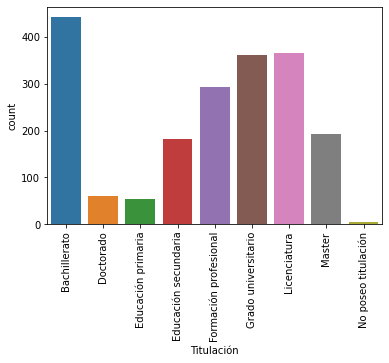

In [28]:
eda_cat(covid_dataset_w1tow4['Titulación'])

In [29]:
# update selected variables
dataset_selected.append('Titulación')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación']


### Situación_laboral

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Situación_laboral
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.4 KB
None 

Empleado tiempo completo          1126
Desempleado buscando empleo        233
Empleado medio tiempo              195
Jubilado                           170
Estudiante                         110
Desempleado no buscando empleo     100
Discapacitado                       17
Name: Situación_laboral, dtype: int64


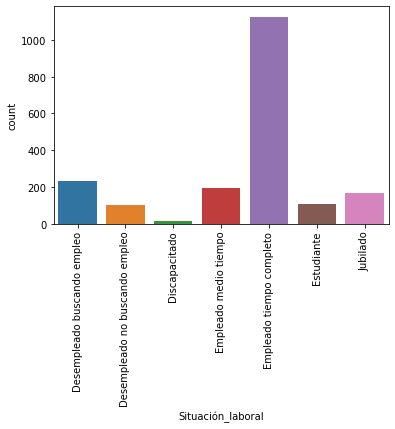

In [30]:
eda_cat(covid_dataset_w1tow4['Situación_laboral'])

In [31]:
# update selected variables
dataset_selected.append('Situación_laboral')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral']


### Adultos_vivienda

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Adultos_vivienda
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.4 KB
None 

2           1066
3            377
1            257
4            201
5             38
6             11
10 o más       1
Name: Adultos_vivienda, dtype: int64


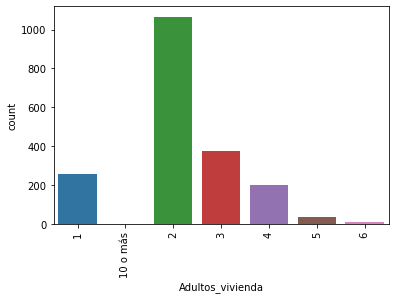

In [32]:
eda_cat(covid_dataset_w1tow4['Adultos_vivienda'])

In [33]:
# update selected variables
dataset_selected.append('Adultos_vivienda')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda']


### Menores_vivienda

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Menores_vivienda
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

0    1163
1     455
2     284
3      42
4       6
6       1
Name: Menores_vivienda, dtype: int64


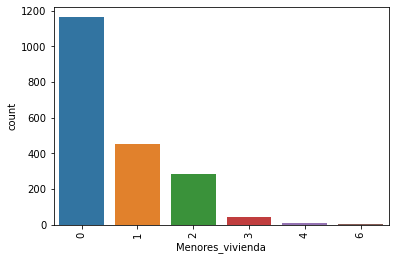

In [34]:
eda_cat(covid_dataset_w1tow4['Menores_vivienda'])

In [35]:
# update selected variables
dataset_selected.append('Menores_vivienda')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda']


### Cuidado_menores
Not selected because categories are not precise.

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Cuidado_menores
Non-Null Count  Dtype   
--------------  -----   
1131 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Uno o ambos progenitor(es)          717
Otro                                320
Uno o ambos abuelo(s)                53
Un miembro de la familia cercano     37
Un amigo de la familia                3
Un miembro de la familia lejana       1
Name: Cuidado_menores, dtype: int64


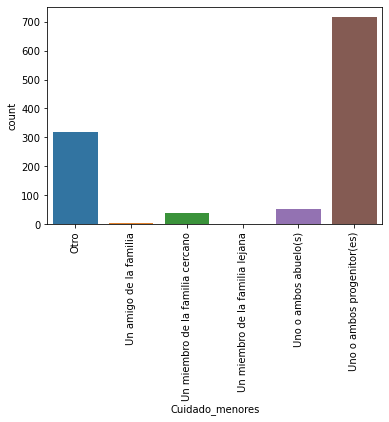

In [36]:
eda_cat(covid_dataset_w1tow4['Cuidado_menores'])

### Descripción_lugar_vivienda

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Descripción_lugar_vivienda
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.4 KB
None 

Soy el dueño                                                                                                                             788
La estoy comprando con ayuda de una hipoteca o préstamo                                                                                  485
Lo alquilo                                                                                                                               347
Vivo aquí sin pagar alquiler (incluye cualquier tipo de renta gratuita como casa de un amigo o familiar, excepto la ocupación ilegal)    269
Otro                                                                                                                                      32
La propiedad es un alquiler opción compra                   

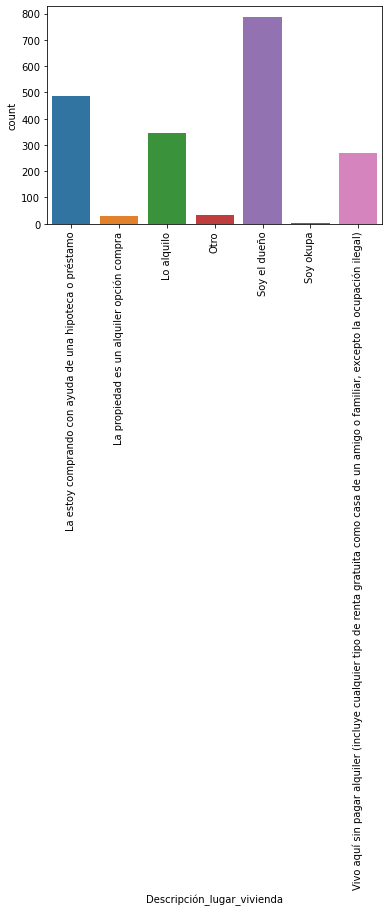

In [37]:
eda_cat(covid_dataset_w1tow4['Descripción_lugar_vivienda'])

In [38]:
# update selected variables
dataset_selected.append('Descripción_lugar_vivienda')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda']


### Ingresos

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Ingresos
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

De 12.450 a 20.200 al año     694
de 20.200 a 35.200  al año    673
De 35.200  a 60.000 al año    456
Más de 60.000 al año          128
Name: Ingresos, dtype: int64


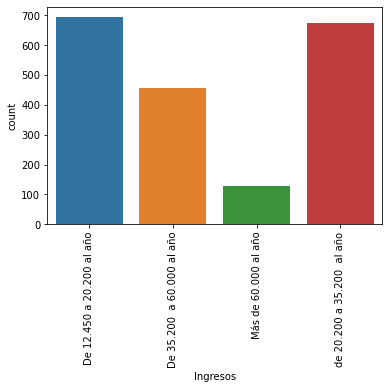

In [39]:
eda_cat(covid_dataset_w1tow4['Ingresos'])

In [40]:
# update selected variables
dataset_selected.append('Ingresos')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos']


### pérdida_ingresos

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: pérdida_ingresos
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Mi hogar ha perdido ingresos debido a la pandemia de COVID-19             974
Mi hogar no ha perdido ingresos debido a la pandemia de COVID-19          858
No sé si mi hogar ha perdido ingresos debido a la pandemia de COVID-19    119
Name: pérdida_ingresos, dtype: int64


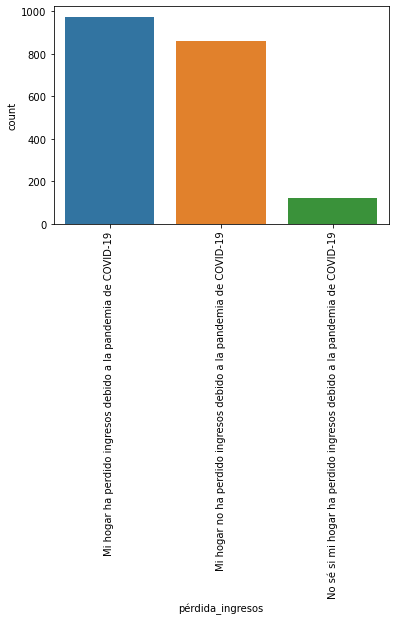

In [41]:
eda_cat(covid_dataset_w1tow4['pérdida_ingresos'])

In [42]:
# update selected variables
dataset_selected.append('pérdida_ingresos')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos']


### gastos_hogar
Not selected because categories are not precise.

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: gastos_hogar
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Mi hogar ha gastado menos debido a la pandemia de COVID-19             1185
Mi hogar no ha gastado menos debido a la pandemia de COVID-19           616
No se si mi hogar ha gastado menos debido a la pandemia de COVID-19     150
Name: gastos_hogar, dtype: int64


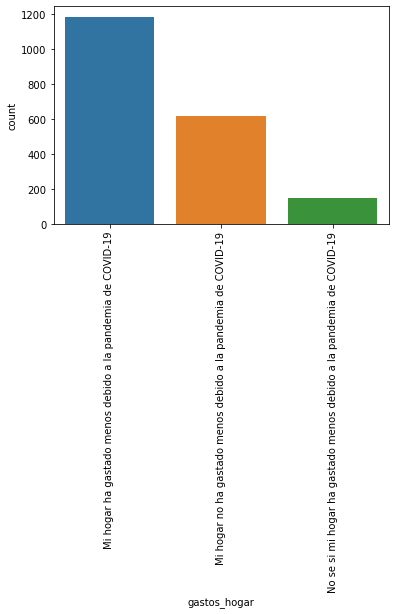

In [43]:
eda_cat(covid_dataset_w1tow4['gastos_hogar'])

### preocupación_economía_covid

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: preocupación_economía_covid
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.4 KB
None 

10. Extremadamente preocupado    330
7                                321
8                                299
5                                216
9                                213
6                                183
1. No me preocupa en absoluto    104
3                                104
4                                 98
2                                 83
Name: preocupación_economía_covid, dtype: int64


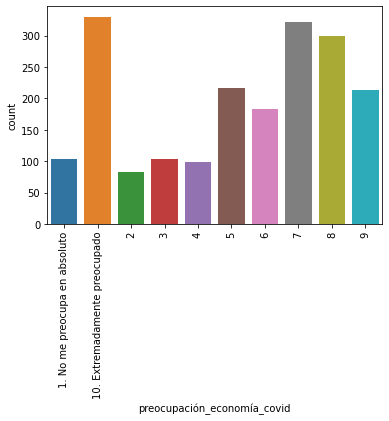

In [44]:
eda_cat(covid_dataset_w1tow4['preocupación_economía_covid'])

In [45]:
# update selected variables
dataset_selected.append('preocupación_economía_covid')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid']


### Saludmental_1, Saludmental_2, Saludmental_3, Saludmental_4 
Q46
Los problemas de salud mental son muy frecuentes. Por favor, indique si ha recibido o recibe algún tipo de tratamiento (medicación o terapia) para estas dificultades. Marque tantas como corresponda:
- Nunca he recibido tratamiento por problemas de salud mental.  (1) 
- He recibido tratamiento por problemas de salud mental en el pasado.  (2) 
- Actualmente estoy recibiendo tratamiento por problemas de salud mental.  (3) 
- Prefiero no responder a esta pregunta.  (4)

In [46]:
# Saludmental_1 (Saludmental_2 is redundant and Saludmental_4 gives no information about the person's mental health)
# replace categories to 1 (yes) or 0 (no)
covid_dataset_w1tow4['Saludmental_1'].replace('Nunca he recibido tratamiento por problemas de salud mental.',
                                               "0", inplace=True)
covid_dataset_w1tow4['Saludmental_1'] = covid_dataset_w1tow4['Saludmental_1'].cat.add_categories("1").fillna("1")

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Saludmental_tratamiento_pasado
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

0    1533
1     418
Name: Saludmental_tratamiento_pasado, dtype: int64


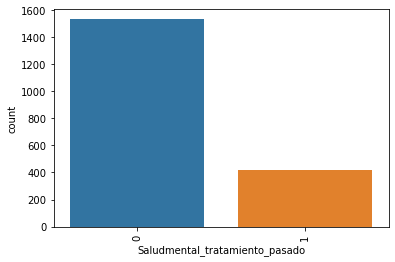

In [47]:
# Saludmental_1 -> Saludmental_tratamiento_pasado
#rename to a more understandable name
covid_dataset_w1tow4.rename(columns={"Saludmental_1": "Saludmental_tratamiento_pasado"}, inplace=True)

eda_cat(covid_dataset_w1tow4['Saludmental_tratamiento_pasado'])

In [48]:
#Saludmental_3

# replace categories to 1 (yes) or 0 (no)
covid_dataset_w1tow4['Saludmental_3'].replace('Actualmente estoy recibiendo tratamiento por problemas de salud mental.',
                                               '1', inplace=True)
covid_dataset_w1tow4['Saludmental_3'] = covid_dataset_w1tow4['Saludmental_3'].cat.add_categories("0").fillna("0")

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Saludmental_tratamiento_presente
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

0    1832
1     119
Name: Saludmental_tratamiento_presente, dtype: int64


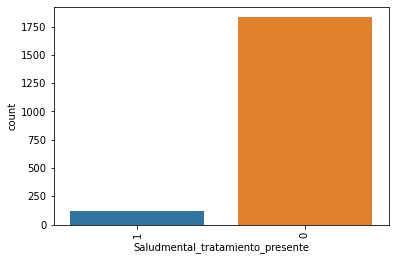

In [49]:
# Saludmental_3 -> Saludmental_tratamiento_presente
#rename to a more understandable name
covid_dataset_w1tow4.rename(columns={"Saludmental_3": "Saludmental_tratamiento_presente"}, inplace=True)

eda_cat(covid_dataset_w1tow4['Saludmental_tratamiento_presente'])

In [50]:
# update selected variables
dataset_selected.append('Saludmental_tratamiento_pasado')
dataset_selected.append('Saludmental_tratamiento_presente')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente']


### Religión

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Religión
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.4 KB
None 

Cristiana - Católica                              1036
Atea                                               423
Agnóstica                                          375
Otra creencia religiosa. Por favor especifíque      53
Cristiana -Evangélica                               34
Musulmana                                           18
Budista                                              9
Judía                                                3
Name: Religión, dtype: int64


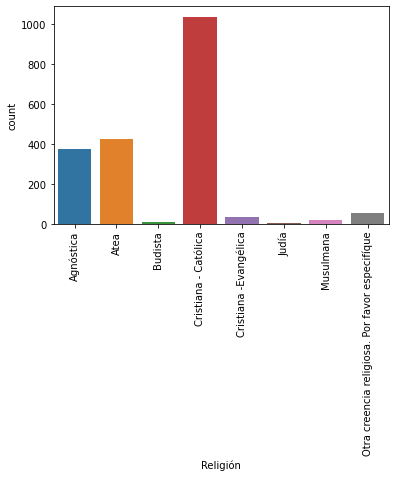

In [51]:
eda_cat(covid_dataset_w1tow4['Religión'])

In [52]:
# update selected variables
dataset_selected.append('Religión')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión']


### Voto_elecciones
Not selected because variable offers no intrinsic personal information and categories are not precise

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Voto_elecciones
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Sí, voté.                            1606
No, no voté.                          277
No voté debido a mi nacionalidad.      33
Prefiero no decir.                     31
No voté debido a mi edad.               4
Name: Voto_elecciones, dtype: int64


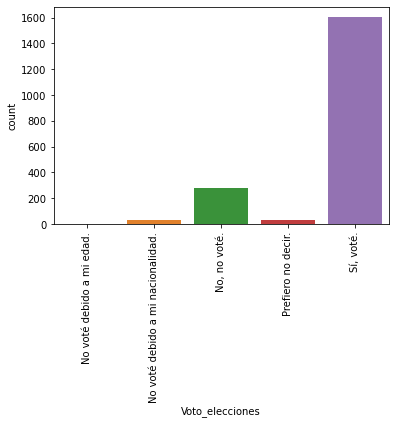

In [53]:
eda_cat(covid_dataset_w1tow4['Voto_elecciones'])

### Partido_votado
Not selected because variable offers no intrinsic personal information

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: Partido_votado
Non-Null Count  Dtype   
--------------  -----   
1606 non-null   category
dtypes: category(1)
memory usage: 2.4 KB
None 

Partido Socialista Obrero Español    432
Unidas Podemos                       266
VOX                                  185
Partido Popular                      172
Ciudadanos                           163
Prefiero no decir                    150
Otros                                149
Esquerra Republicana de Catalunya     62
Euskal Herria Bildu                   14
Partido Nacionalista Vasco            11
Plural                                 2
Name: Partido_votado, dtype: int64


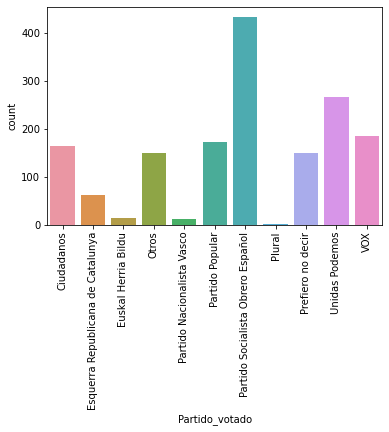

In [54]:
eda_cat(covid_dataset_w1tow4['Partido_votado'])

### Ideología_política
Utilizamos la escala TOTAL contruida a partir de los items recodificados `izquierda_derecha`, `Opinión_política_aborto` y `Opinión_política_economía`.

count    1951.000000
mean        4.137195
std         1.939050
min         1.000000
25%         2.666667
50%         4.000000
75%         5.333333
max        10.000000
Name: Ideología_politica, dtype: float64

Nulls: 0 | Zeros: 0


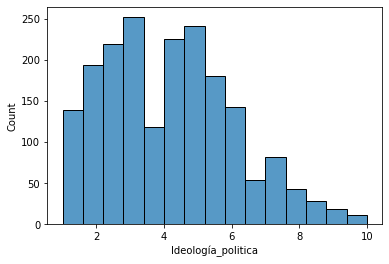

In [55]:
eda_num(covid_dataset_w1tow4['Ideología_politica'])

In [56]:
# update selected variables
dataset_selected.append('Ideología_politica')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica']


### PatriotismoTOTAL
Utilizamos la escala TOTAL contruida a partir de los items `patriotismo1`, `patriotismo2`, `patriotismo3`.

count    1951.000000
mean        3.026311
std         0.874255
min         1.000000
25%         2.333333
50%         3.000000
75%         3.666667
max         5.000000
Name: PatriotismoTOTAL, dtype: float64

Nulls: 0 | Zeros: 0


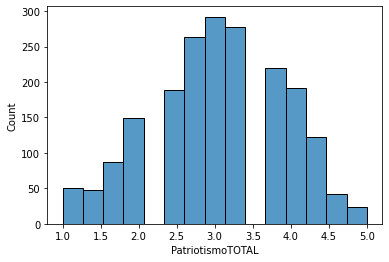

In [57]:
eda_num(covid_dataset_w1tow4['PatriotismoTOTAL'])

In [58]:
# update selected variables
dataset_selected.append('PatriotismoTOTAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL']


### NacionalismoTOTAL
Utilizamos la escala TOTAL contruida a partir de los items `nacionalismo1`, `nacionalismo2`.

count    1951.000000
mean        3.026653
std         0.884225
min         1.000000
25%         2.500000
50%         3.000000
75%         3.500000
max         5.000000
Name: NacionalismoTOTAL, dtype: float64

Nulls: 0 | Zeros: 0


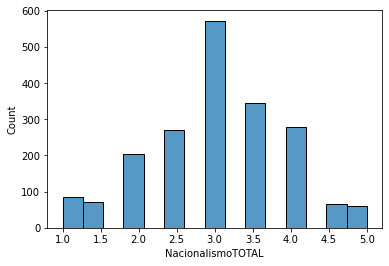

In [59]:
eda_num(covid_dataset_w1tow4['NacionalismoTOTAL'])

In [60]:
# update selected variables
dataset_selected.append('NacionalismoTOTAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL']


### Authoritharism_VSAS
Utilizamos la escala TOTAL contruida a partir de los items VSA recodificados `rec_vsas_1` a `rec_vsas_6`.

count    1951.000000
mean        2.565949
std         0.680650
min         1.000000
25%         2.166667
50%         2.666667
75%         3.000000
max         4.666667
Name: Authoritharism_VSAS, dtype: float64

Nulls: 0 | Zeros: 0


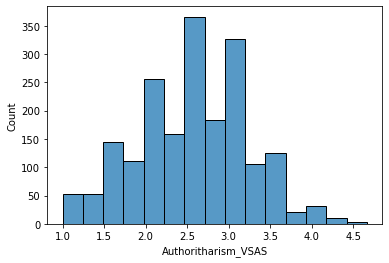

In [61]:
eda_num(covid_dataset_w1tow4['Authoritharism_VSAS'])

In [62]:
# update selected variables
dataset_selected.append('Authoritharism_VSAS')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS']


### RELIGIOUSITY
Utilizamos la escala TOTAL contruida a partir de los items recodificados `rec_religious_identity1`, `rec_religious_identity2`.

count    1951.000000
mean        2.853665
std         0.913565
min         1.000000
25%         2.500000
50%         3.000000
75%         3.500000
max         5.000000
Name: RELIGIOUSITY, dtype: float64

Nulls: 0 | Zeros: 0


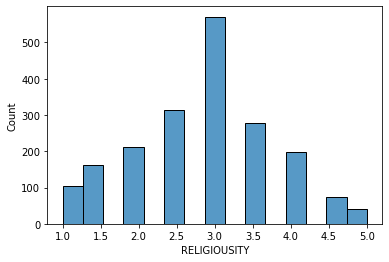

In [63]:
eda_num(covid_dataset_w1tow4['RELIGIOUSITY'])

In [64]:
# update selected variables
dataset_selected.append('RELIGIOUSITY')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY']


### SDO_TOTAL
Utilizamos la escala TOTAL contruida a partir de los items recodificados `SDO_DOMINANCIA` y `SDO_ANTIIGUAL`.

count    1951.000000
mean        2.021784
std         0.701628
min         1.000000
25%         1.500000
50%         2.000000
75%         2.562500
max         4.875000
Name: SDO_TOTAL, dtype: float64

Nulls: 0 | Zeros: 0


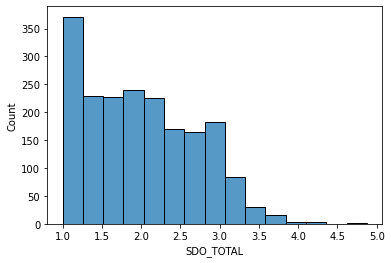

In [65]:
eda_num(covid_dataset_w1tow4['SDO_TOTAL'])

In [66]:
# update selected variables
dataset_selected.append('SDO_TOTAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL']


### ATTITUDE_MIGRANTS
Utilizamos la escala TOTAL contruida a partir de los items recodificados `ACTITUD_HACIA_INMIGRANTES_1`, `ACTITUD_HACIA_INMIGRANTES_2`, `ACTITUD_HACIA_INMIGRANTES_3`

count    1951.000000
mean        6.708867
std         1.517941
min         2.666667
25%         6.000000
50%         6.666667
75%         7.666667
max        10.000000
Name: ATTITUDE_MIGRANTS, dtype: float64

Nulls: 0 | Zeros: 0


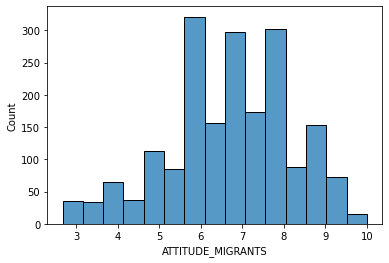

In [67]:
eda_num(covid_dataset_w1tow4['ATTITUDE_MIGRANTS'])

In [68]:
# update selected variables
dataset_selected.append('ATTITUDE_MIGRANTS')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS']


### HUMANITY_TOTAL
Utilizamos la escala TOTAL contruida a partir de los items recodificados `HUMANITY_GENTE_ENTORNO`, `HUMANITY_GENTE_ESPAÑA`, `HUMANITY_MUNDO`

count    1951.000000
mean        3.782106
std         0.638875
min         1.000000
25%         3.333333
50%         3.777778
75%         4.222222
max         5.000000
Name: HUMANITY_TOTAL, dtype: float64

Nulls: 0 | Zeros: 0


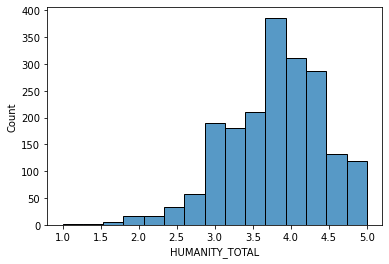

In [69]:
eda_num(covid_dataset_w1tow4['HUMANITY_TOTAL'])

In [70]:
# update selected variables
dataset_selected.append('HUMANITY_TOTAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL']


### Teorías_de_la_conspiración 
Utilizamos la escala TOTAL contruida a partir de los items recodificados `CMQ_1` a `CMQ_5`.

count    1951.000000
mean        8.140236
std         1.839848
min         1.000000
25%         7.000000
50%         8.400000
75%         9.600000
max        11.000000
Name: Teorías_de_la_conspiración, dtype: float64

Nulls: 0 | Zeros: 0


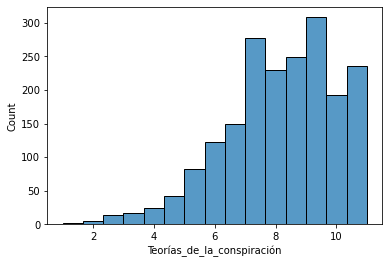

In [71]:
eda_num(covid_dataset_w1tow4['Teorías_de_la_conspiración'])

In [72]:
# update selected variables
dataset_selected.append('Teorías_de_la_conspiración')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración']


### CONFIANZA_EN_OTROS
Nos quedamos con este ítem ya que los demás parecen mejor representados por el CMQ.

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: CONFIANZA_EN_OTROS
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

3                                                           770
4                                                           434
2                                                           404
5\n\nNo se puede confiar en la mayoría de las personas\n    225
1\nSe puede confiar en la mayoría de las personas\n         118
Name: CONFIANZA_EN_OTROS, dtype: int64


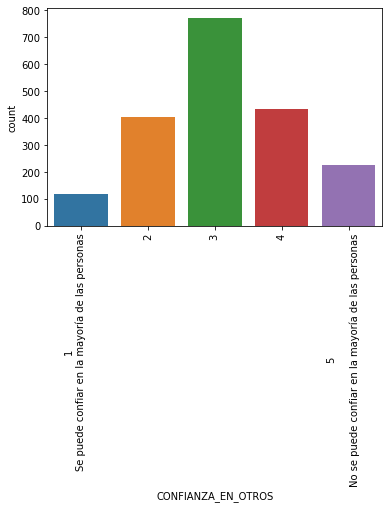

In [73]:
eda_cat(covid_dataset_w1tow4['CONFIANZA_EN_OTROS'])

In [74]:
# update selected variables
dataset_selected.append('CONFIANZA_EN_OTROS')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS']


### TIENE_DIABETES_PULMONAR_CARDIOPATIA, FAM_DIABETES_PULMONAR_CARDIOPATIA
Not selected because answers are ambiguous.

### EMBARAZO_PROPIO, EMBARAZADA_DE_CUANTO, EMBARAZO_OTRO_FAM
Idem

### ANSIEDAD_POR_COVID

count    1951.000000
mean       58.460277
std        26.338299
min         0.000000
25%        40.000000
50%        63.000000
75%        80.000000
max       100.000000
Name: ANSIEDAD_POR_COVID, dtype: float64

Nulls: 0 | Zeros: 31


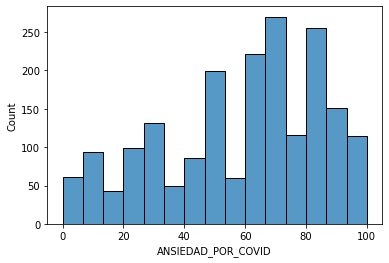

In [75]:
eda_num(covid_dataset_w1tow4['ANSIEDAD_POR_COVID'])

In [76]:
# update selected variables
dataset_selected.append('ANSIEDAD_POR_COVID')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID']


### CUANTA_INFO / CONFIANZA_INFO
Not selected because variable offers too granular information.

### ENFERMO_COVID, PRUEBA_COVID, CERCANO_COVID, RIESGO_COVID, MUERTE_POR_COVID
Not selected because variable answers are ambiguous.

### COVID_KNOWLEDGE
Utilizamos la escala TOTAL contruida a partir de los items recodificados `SINTOMAS_1`, `SINTOMAS_5`, `SINTOMAS_9`, `SINTOMAS_13` y `SINTOMAS_14`. 

count    1951.000000
mean        4.478216
std         0.943758
min         0.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: COVID_KNOWLEDGE, dtype: float64

Nulls: 0 | Zeros: 19


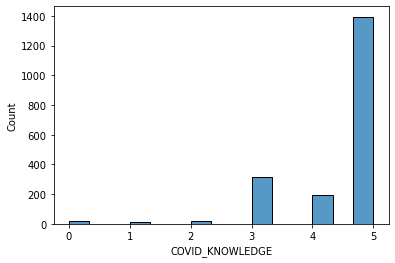

In [77]:
eda_num(covid_dataset_w1tow4['COVID_KNOWLEDGE'])

In [78]:
# update selected variables
dataset_selected.append('COVID_KNOWLEDGE')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE']


### COVID_TRANSMISSION
Utilizamos la escala TOTAL contruida a partir de los items recodificados `CONTAGIO_3`, `CONTAGIO_4`, `CONTAGIO_5` y `CONTAGIO_6`.

count    1951.000000
mean        2.558175
std         1.113356
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         4.000000
Name: COVID_TRANSMISSION, dtype: float64

Nulls: 0 | Zeros: 118


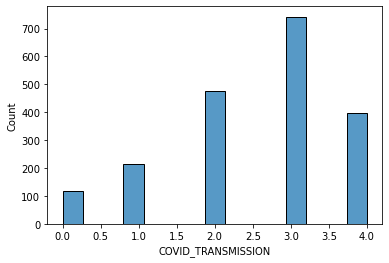

In [79]:
eda_num(covid_dataset_w1tow4['COVID_TRANSMISSION'])

In [80]:
# update selected variables
dataset_selected.append('COVID_TRANSMISSION')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION']


### COVID_ENGAGEMENT
Utilizamos la escala TOTAL contruida a partir de los items recodificados `MEDIDAS_ANTI_COVID_2`, `MEDIDAS_ANTI_COVID_3`, `MEDIDAS_ANTI_COVID_4`, `MEDIDAS_ANTI_COVID_5` y `MEDIDAS_ANTI_COVID_6`.

count    1951.000000
mean        2.548949
std         0.860851
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         5.000000
Name: COVID_ENGAGEMENT, dtype: float64

Nulls: 0 | Zeros: 53


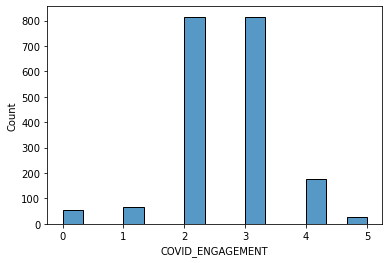

In [81]:
eda_num(covid_dataset_w1tow4['COVID_ENGAGEMENT'])

In [82]:
# update selected variables
dataset_selected.append('COVID_ENGAGEMENT')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT']


### AISLAMIENTO

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: AISLAMIENTO
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

No    1736
Sí     215
Name: AISLAMIENTO, dtype: int64


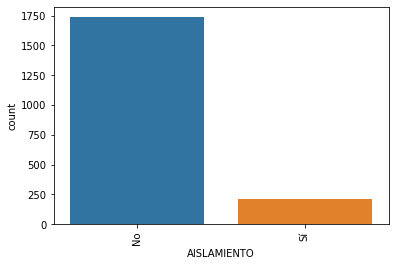

In [83]:
eda_cat(covid_dataset_w1tow4['AISLAMIENTO'])

In [84]:
# update selected variables
dataset_selected.append('AISLAMIENTO')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO']


### MAS_COMPRA, CAMBIO_PLANES
Not selected because answers are irrelevant to resilience or ambiguous.ambiguas

### HABITOS, QUE_HACER, NUMERO_COVID_SI_NO, NUMERO_COVID
Not selected because these variables overlap with another variables about COVID knowledge.

### VACUNA_USTED
Only this item.

<class 'pandas.core.series.Series'>
RangeIndex: 1951 entries, 0 to 1950
Series name: VACUNA_USTED
Non-Null Count  Dtype   
--------------  -----   
1951 non-null   category
dtypes: category(1)
memory usage: 2.2 KB
None 

Sí              1231
Quizás           531
No               170
No aplicable      19
Name: VACUNA_USTED, dtype: int64


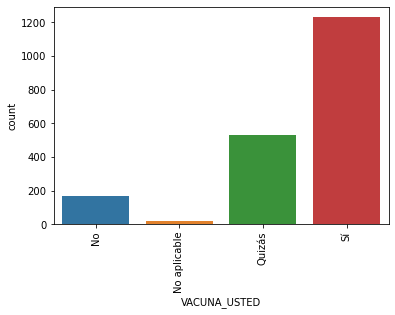

In [85]:
eda_cat(covid_dataset_w1tow4['VACUNA_USTED'])

In [86]:
# update selected variables
dataset_selected.append('VACUNA_USTED')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED']


### PHQ_15_TOTAL (Somatic symptoms)

count    1951.000000
mean        4.250641
std         4.230199
min         0.000000
25%         1.000000
50%         3.000000
75%         6.000000
max        26.000000
Name: PHQ_15_TOTAL, dtype: float64

Nulls: 0 | Zeros: 384


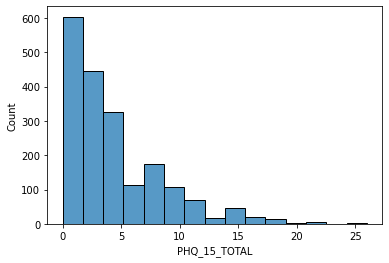

In [87]:
eda_num(covid_dataset_w1tow4['PHQ_15_TOTAL'])

In [88]:
# update selected variables
dataset_selected.append('PHQ_15_TOTAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL']


### PHQ_9_TOTAL (Depression symptoms)

count    1951.000000
mean        6.506407
std         5.656749
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        27.000000
Name: PHQ_9_TOTAL, dtype: float64

Nulls: 0 | Zeros: 272


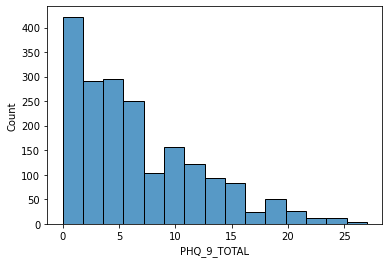

In [89]:
eda_num(covid_dataset_w1tow4['PHQ_9_TOTAL'])

In [90]:
# update selected variables
dataset_selected.append('PHQ_9_TOTAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL']


### DEP_DIAGN

count    1951.000000
mean        0.159405
std         0.366148
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: DEP_DIAGN, dtype: float64

Nulls: 0 | Zeros: 1640


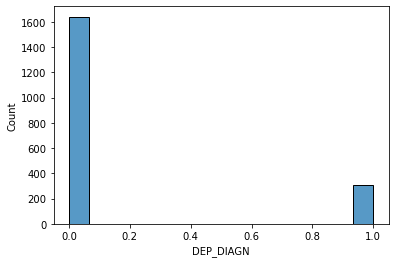

In [91]:
eda_num(covid_dataset_w1tow4['DEP_DIAGN'])

In [92]:
# update selected variables
dataset_selected.append('DEP_DIAGN')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN']


### SUBSTANCE_SCORE

count    1951.000000
mean        1.679139
std         2.076380
min         0.000000
25%         0.000000
50%         1.000000
75%         2.500000
max        15.000000
Name: SUBSTANCE_SCORE, dtype: float64

Nulls: 0 | Zeros: 720


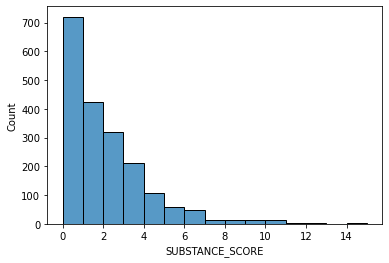

In [93]:
eda_num(covid_dataset_w1tow4['SUBSTANCE_SCORE'])

In [94]:
# update selected variables
dataset_selected.append('SUBSTANCE_SCORE')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE']


### GAD_TOTAL (Anxiety symptoms)

count    1951.000000
mean        5.866222
std         5.244195
min         0.000000
25%         1.000000
50%         5.000000
75%         9.000000
max        21.000000
Name: GAD_TOTAL, dtype: float64

Nulls: 0 | Zeros: 328


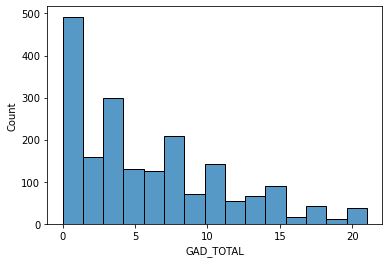

In [95]:
eda_num(covid_dataset_w1tow4['GAD_TOTAL'])

In [96]:
# update selected variables
dataset_selected.append('GAD_TOTAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL']


### PADS_TOTAL (Paranoia)

count    1951.000000
mean        5.965146
std         4.434343
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        20.000000
Name: PADS_TOTAL, dtype: float64

Nulls: 0 | Zeros: 290


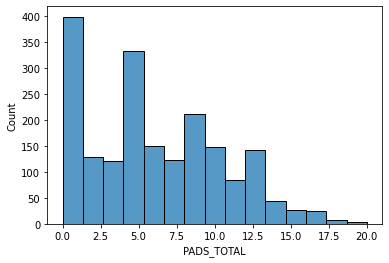

In [97]:
eda_num(covid_dataset_w1tow4['PADS_TOTAL'])

In [98]:
# update selected variables
dataset_selected.append('PADS_TOTAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL']


### PTSD clusters from ITQ (Trauma)

count    1951.000000
mean        0.996412
std         1.681418
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         8.000000
Name: PTSD_REEXP, dtype: float64

Nulls: 0 | Zeros: 1261


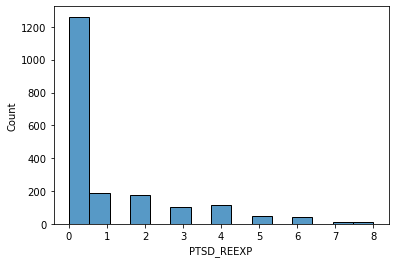

In [99]:
eda_num(covid_dataset_w1tow4['PTSD_REEXP'])

count    1951.000000
mean        1.618145
std         2.007999
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         8.000000
Name: PTSD_AVOID, dtype: float64

Nulls: 0 | Zeros: 951


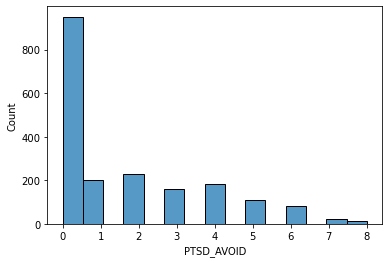

In [100]:
eda_num(covid_dataset_w1tow4['PTSD_AVOID'])

count    1951.000000
mean        2.173244
std         1.977235
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max         8.000000
Name: PTSD_THREAT, dtype: float64

Nulls: 0 | Zeros: 529


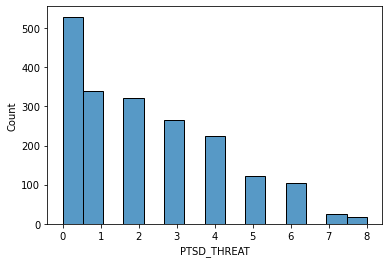

In [101]:
eda_num(covid_dataset_w1tow4['PTSD_THREAT'])

count    1951.000000
mean        4.787801
std         4.998264
min         0.000000
25%         1.000000
50%         3.000000
75%         8.000000
max        24.000000
Name: PTSD_SEVERITY, dtype: float64

Nulls: 0 | Zeros: 438


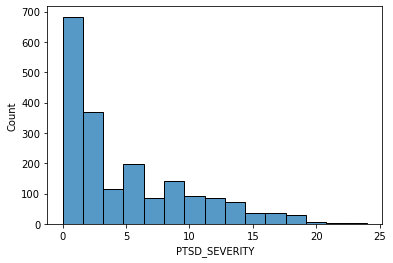

In [102]:
eda_num(covid_dataset_w1tow4['PTSD_SEVERITY'])

count    1951.000000
mean        2.223475
std         2.781677
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        12.000000
Name: PTSD_IMPAIR, dtype: float64

Nulls: 0 | Zeros: 878


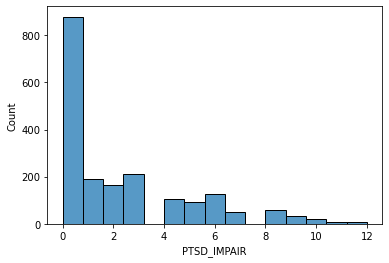

In [103]:
eda_num(covid_dataset_w1tow4['PTSD_IMPAIR'])

count    1951.000000
mean        0.196822
std         0.397699
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: PTSD_DIAGNOSIS, dtype: float64

Nulls: 0 | Zeros: 1567


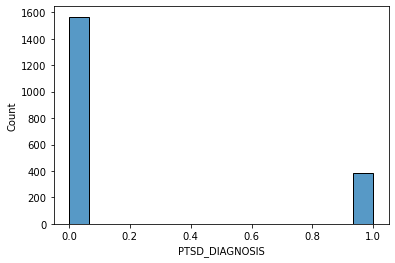

In [104]:
eda_num(covid_dataset_w1tow4['PTSD_DIAGNOSIS'])

In [105]:
# update selected variables
dataset_selected = dataset_selected + ['PTSD_REEXP',
 'PTSD_AVOID',
 'PTSD_THREAT',
 'PTSD_SEVERITY',
 'PTSD_IMPAIR',
 'PTSD_DIAGNOSIS']
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS']


### PTSD_TOTAL (from PCL-5)

count    1951.000000
mean        4.379805
std         4.409173
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        20.000000
Name: PTSD_TOTAL, dtype: float64

Nulls: 0 | Zeros: 464


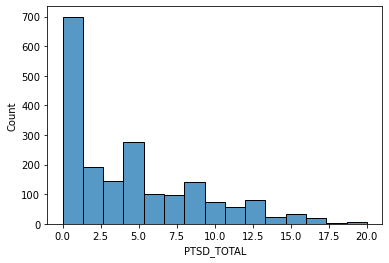

In [106]:
eda_num(covid_dataset_w1tow4['PTSD_TOTAL'])

In [107]:
# update selected variables
dataset_selected.append('PTSD_TOTAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL']


### SUBST_STRESS (from PCL-5)

count    1951.000000
mean        0.273706
std         0.445974
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: SUBST_STRESS, dtype: float64

Nulls: 0 | Zeros: 1417


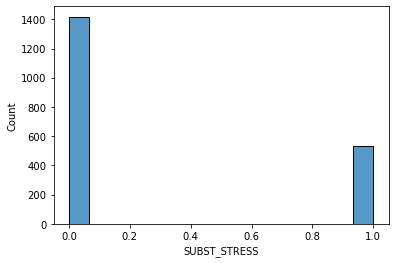

In [108]:
eda_num(covid_dataset_w1tow4['SUBST_STRESS'])

In [109]:
# update selected variables
dataset_selected.append('SUBST_STRESS')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS']


### CRT_TOTAL (psicotécnico)

count    1951.000000
mean        0.860584
std         1.070844
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max         3.000000
Name: CRT_TOTAL, dtype: float64

Nulls: 0 | Zeros: 1018


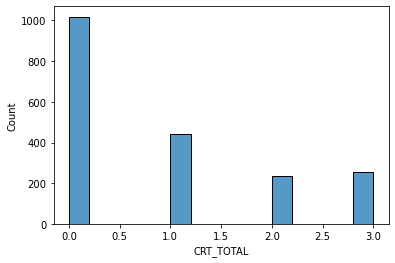

In [110]:
eda_num(covid_dataset_w1tow4['CRT_TOTAL'])

In [111]:
# update selected variables
dataset_selected.append('CRT_TOTAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL']


### Face_trust, JTC_
Not used because variables are too ambiguous.

### LONELI (TILS)
Utilizamos la escala TOTAL contruida a partir de los items recodificados `Loneliness_1`, `Loneliness_2` y `Loneliness_3`.

count    1951.000000
mean        4.485905
std         1.639162
min         3.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: LONELI, dtype: float64

Nulls: 0 | Zeros: 0


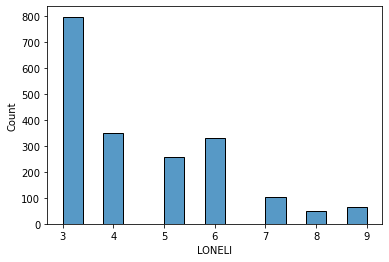

In [112]:
eda_num(covid_dataset_w1tow4['LONELI'])

In [113]:
# update selected variables
dataset_selected.append('LONELI')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI']


### LMLOS (Locus of control)
We use subscales created with variables `Locus_control_1` to `Locus_control_9`

count    1951.000000
mean       10.437724
std         3.565230
min         3.000000
25%         8.000000
50%        11.000000
75%        13.000000
max        21.000000
Name: LMLOS_chance, dtype: float64

Nulls: 0 | Zeros: 0


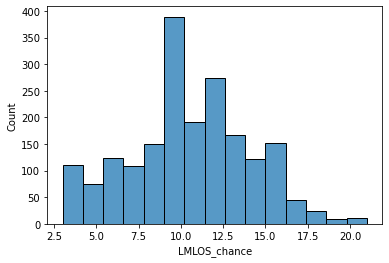

In [114]:
eda_num(covid_dataset_w1tow4['LMLOS_chance'])

count    1951.000000
mean       10.578165
std         4.233434
min         3.000000
25%         7.000000
50%        11.000000
75%        13.000000
max        21.000000
Name: LMLOS_powerful, dtype: float64

Nulls: 0 | Zeros: 0


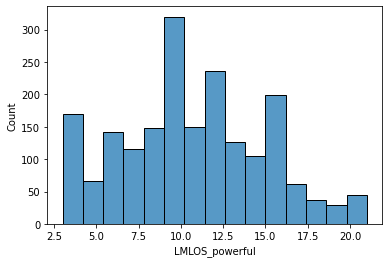

In [115]:
eda_num(covid_dataset_w1tow4['LMLOS_powerful'])

count    1951.000000
mean       14.926192
std         3.012229
min         3.000000
25%        13.000000
50%        15.000000
75%        17.000000
max        21.000000
Name: LMLOS_internal, dtype: float64

Nulls: 0 | Zeros: 0


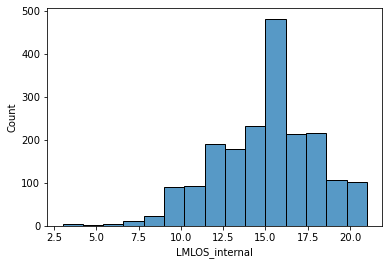

In [116]:
eda_num(covid_dataset_w1tow4['LMLOS_internal'])

In [117]:
# update selected variables
dataset_selected = dataset_selected + ['LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal'] 
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI', 'LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal']


### OFS_total (Openess to future)
Utilizamos la escala TOTAL contruida a partir de los items recodificados `Openness_Future_1` a `Openness_Future_10`.

count    1951.000000
mean       38.180420
std         6.067251
min        14.000000
25%        35.000000
50%        39.000000
75%        42.000000
max        50.000000
Name: OFS_total, dtype: float64

Nulls: 0 | Zeros: 0


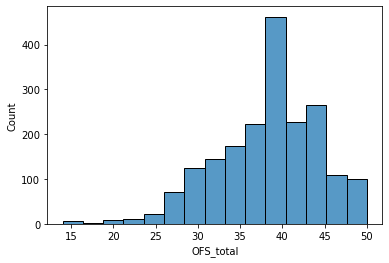

In [118]:
eda_num(covid_dataset_w1tow4['OFS_total'])

In [119]:
# update selected variables
dataset_selected.append('OFS_total')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI', 'LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal', 'OFS_total']

### BRS_total (Resilience)
Utilizamos la escala TOTAL contruida a partir de los items recodificados `Brief_Resistance_Scale_1` a `Brief_Resistance_Scale_6`.

count    1951.000000
mean        3.461473
std         0.754613
min         1.000000
25%         3.000000
50%         3.500000
75%         4.000000
max         5.000000
Name: BRS_total, dtype: float64

Nulls: 0 | Zeros: 0


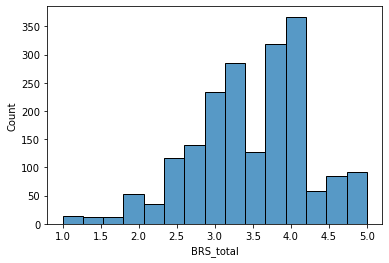

In [120]:
eda_num(covid_dataset_w1tow4['BRS_total'])

In [121]:
# update selected variables
dataset_selected.append('BRS_total')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI', 'LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal', 'OFS_total',

### DAI (Death Anxiety)
Subescalas y TOTAL de `Death_Anxiety_1` a `Death_anxiety_5`.

count    1951.000000
mean        2.465402
std         1.248058
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Externallygenerated_DAI, dtype: float64

Nulls: 0 | Zeros: 0


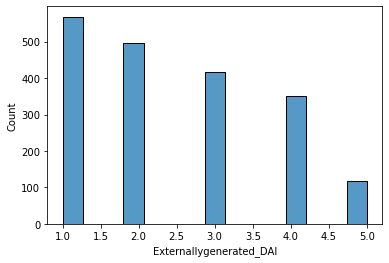

In [122]:
eda_num(covid_dataset_w1tow4['Externallygenerated_DAI'])

count    1951.000000
mean        2.247053
std         1.135199
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Meaning_DAI, dtype: float64

Nulls: 0 | Zeros: 0


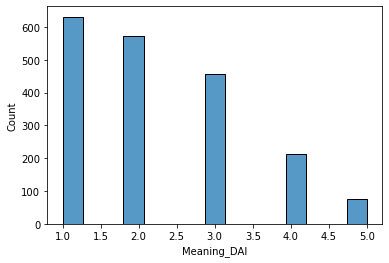

In [123]:
eda_num(covid_dataset_w1tow4['Meaning_DAI'])

count    1951.000000
mean        2.366479
std         1.188183
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Thoughts_DAI, dtype: float64

Nulls: 0 | Zeros: 0


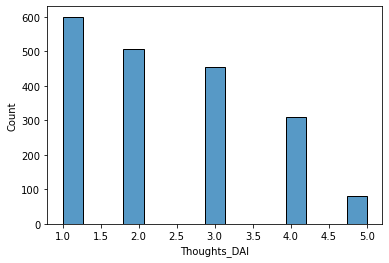

In [124]:
eda_num(covid_dataset_w1tow4['Thoughts_DAI'])

count    1951.000000
mean        2.492055
std         1.286543
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Life_DAI, dtype: float64

Nulls: 0 | Zeros: 0


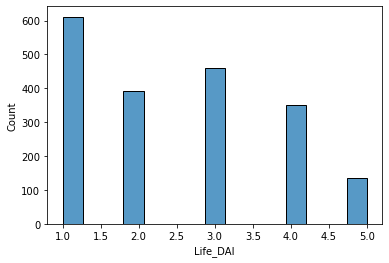

In [125]:
eda_num(covid_dataset_w1tow4['Life_DAI'])

count    1951.000000
mean        2.190159
std         1.107654
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: Brevity_DAI, dtype: float64

Nulls: 0 | Zeros: 0


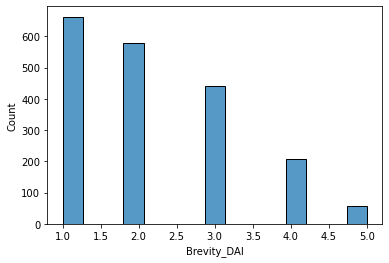

In [126]:
eda_num(covid_dataset_w1tow4['Brevity_DAI'])

count    1951.000000
mean       11.761148
std         4.489686
min         5.000000
25%         8.000000
50%        11.000000
75%        15.000000
max        25.000000
Name: DAI_TOTAL, dtype: float64

Nulls: 0 | Zeros: 0


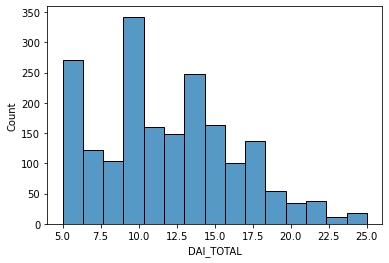

In [127]:
eda_num(covid_dataset_w1tow4['DAI_TOTAL'])

In [128]:
# update selected variables
dataset_selected = dataset_selected + ['Externallygenerated_DAI',
 'Meaning_DAI',
 'Thoughts_DAI',
 'Life_DAI',
 'Brevity_DAI',
 'DAI_TOTAL'] 
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI', 'LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal', 'OFS_total',

### IUS_total (Intolerance uncertainty)
Utilizamos la escala TOTAL contruida a partir de los items recodificados `Intolerance_Uncertain_1` a `Intolerance_Uncertain_12`.

count    1951.000000
mean       33.011789
std         9.359178
min        12.000000
25%        26.000000
50%        33.000000
75%        39.000000
max        60.000000
Name: IUS_total, dtype: float64

Nulls: 0 | Zeros: 0


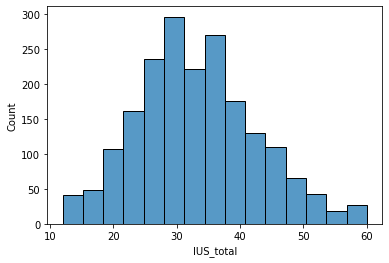

In [129]:
eda_num(covid_dataset_w1tow4['IUS_total'])

In [130]:
# update selected variables
dataset_selected.append('IUS_total')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI', 'LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal', 'OFS_total',

### PHI (Happiness)
Subescalas y TOTAL de `PHI_1_Remembered` a `PHI_10_Experiences`.

count    1951.000000
mean        7.126369
std         1.598368
min         0.272727
25%         6.272727
50%         7.272727
75%         8.272727
max        10.000000
Name: PEMBERTON_REMEMBERED, dtype: float64

Nulls: 0 | Zeros: 0


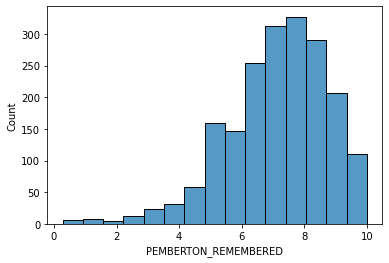

In [131]:
eda_num(covid_dataset_w1tow4['PEMBERTON_REMEMBERED'])

count    1951.000000
mean        3.417222
std         1.367832
min         0.000000
25%         3.000000
50%         4.000000
75%         4.500000
max         5.000000
Name: PEMBERTON_POSITIVE_EXPERIENCES, dtype: float64

Nulls: 0 | Zeros: 70


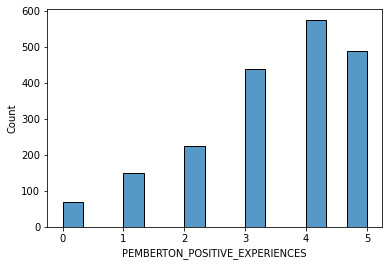

In [132]:
eda_num(covid_dataset_w1tow4['PEMBERTON_POSITIVE_EXPERIENCES'])

count    1951.000000
mean        3.721169
std         1.335572
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: PEMBERTON_NEGATIVE_EXPERIENCES, dtype: float64

Nulls: 0 | Zeros: 54


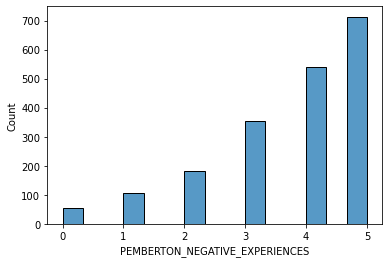

In [133]:
eda_num(covid_dataset_w1tow4['PEMBERTON_NEGATIVE_EXPERIENCES'])

count    1951.000000
mean        7.138391
std         2.044710
min         0.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        10.000000
Name: PEMBERTON_EXPERIENCIAS, dtype: float64

Nulls: 0 | Zeros: 3


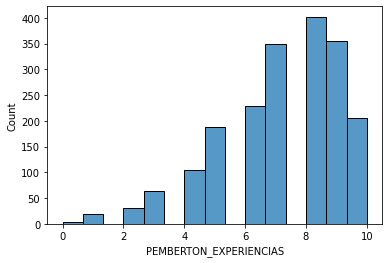

In [134]:
eda_num(covid_dataset_w1tow4['PEMBERTON_EXPERIENCIAS'])

count    1951.000000
mean        7.127371
std         1.556974
min         0.416667
25%         6.250000
50%         7.333333
75%         8.250000
max        10.000000
Name: PEMBERTON_TOTAL, dtype: float64

Nulls: 0 | Zeros: 0


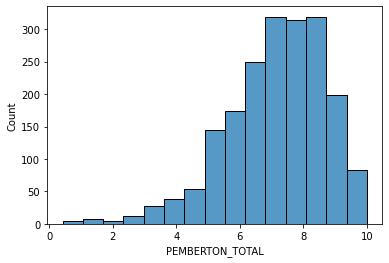

In [135]:
eda_num(covid_dataset_w1tow4['PEMBERTON_TOTAL'])

In [136]:
# update selected variables
dataset_selected = dataset_selected + ['PEMBERTON_REMEMBERED', 'PEMBERTON_POSITIVE_EXPERIENCES',
                                      'PEMBERTON_NEGATIVE_EXPERIENCES', 'PEMBERTON_EXPERIENCIAS',
                                      'PEMBERTON_TOTAL']
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI', 'LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal', 'OFS_total',

### PI (Primal Inventory)
Utilizamos la escala TOTAL contruida a partir de los items recodificados `Primals_1` a `Primals_6`.

count    1951.000000
mean        3.377242
std         0.858397
min         0.000000
25%         2.833333
50%         3.500000
75%         4.000000
max         5.000000
Name: PI_total, dtype: float64

Nulls: 0 | Zeros: 2


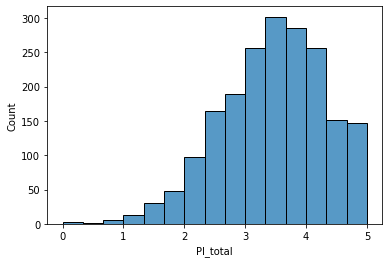

In [137]:
eda_num(covid_dataset_w1tow4['PI_total'])

In [138]:
# update selected variables
dataset_selected.append('PI_total')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI', 'LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal', 'OFS_total',

### PGT_SF_total (Posttraumatic Growth Inventory-Short Form PGTI-SF)
Utilizamos la escala TOTAL contruida a partir de los items recodificados `PT_Growth_1` a `PT_Growth_10`.

count    1951.000000
mean       36.514608
std         7.601259
min         6.000000
25%        31.000000
50%        35.000000
75%        41.000000
max        60.000000
Name: PGT_SF_total, dtype: float64

Nulls: 0 | Zeros: 0


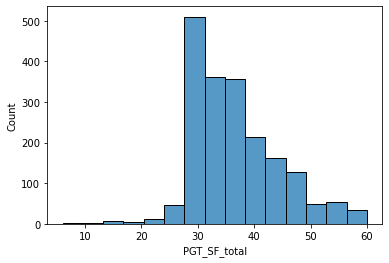

In [139]:
eda_num(covid_dataset_w1tow4['PGT_SF_total'])

In [140]:
# update selected variables
dataset_selected.append('PGT_SF_total')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI', 'LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal', 'OFS_total',

### JTC_COVID, JTC_GENERAL (Unidades de info cogida antes de decidir)
Utilizamos la escala TOTAL contruida a partir de los items recodificados `BITS_STREET`, `BITS_SUPER`, `BITS_FLATS` y `BITS_AMA`.

count    1951.000000
mean        2.108662
std         1.749207
min         1.000000
25%         1.000000
50%         1.500000
75%         2.500000
max        10.000000
Name: JTC_COVID, dtype: float64

Nulls: 0 | Zeros: 0


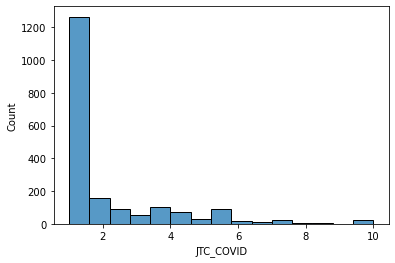

In [141]:
eda_num(covid_dataset_w1tow4['JTC_COVID'])

count    1951.000000
mean        1.980779
std         1.485318
min         1.000000
25%         1.000000
50%         1.500000
75%         2.000000
max        10.000000
Name: JTC_GENERAL, dtype: float64

Nulls: 0 | Zeros: 0


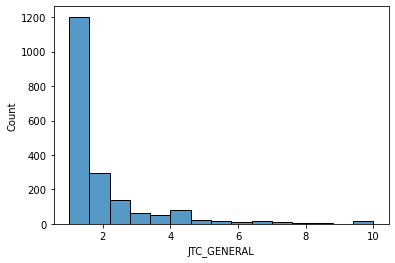

In [142]:
eda_num(covid_dataset_w1tow4['JTC_GENERAL'])

In [143]:
# update selected variables
dataset_selected.append('JTC_COVID')
dataset_selected.append('JTC_GENERAL')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI', 'LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal', 'OFS_total',

## Adding the target from RESILIENT_W1234

In [144]:
dataset_selected.append('RESILIENT_W1234')
print(dataset_selected)

['ID', 'Edad', 'Sexo', 'Zona_vivienda', 'Pertenencia_vecindario', 'Comodidad_vencindario_llaves', 'Comodidad_vencindario_compra', 'Titulación', 'Situación_laboral', 'Adultos_vivienda', 'Menores_vivienda', 'Descripción_lugar_vivienda', 'Ingresos', 'pérdida_ingresos', 'preocupación_economía_covid', 'Saludmental_tratamiento_pasado', 'Saludmental_tratamiento_presente', 'Religión', 'Ideología_politica', 'PatriotismoTOTAL', 'NacionalismoTOTAL', 'Authoritharism_VSAS', 'RELIGIOUSITY', 'SDO_TOTAL', 'ATTITUDE_MIGRANTS', 'HUMANITY_TOTAL', 'Teorías_de_la_conspiración', 'CONFIANZA_EN_OTROS', 'ANSIEDAD_POR_COVID', 'COVID_KNOWLEDGE', 'COVID_TRANSMISSION', 'COVID_ENGAGEMENT', 'AISLAMIENTO', 'VACUNA_USTED', 'PHQ_15_TOTAL', 'PHQ_9_TOTAL', 'DEP_DIAGN', 'SUBSTANCE_SCORE', 'GAD_TOTAL', 'PADS_TOTAL', 'PTSD_REEXP', 'PTSD_AVOID', 'PTSD_THREAT', 'PTSD_SEVERITY', 'PTSD_IMPAIR', 'PTSD_DIAGNOSIS', 'PTSD_TOTAL', 'SUBST_STRESS', 'CRT_TOTAL', 'LONELI', 'LMLOS_chance', 'LMLOS_powerful', 'LMLOS_internal', 'OFS_total',

## Dataset selected features

In [145]:
covid_dataset_sel = covid_dataset_w1tow4[~dataset_filter][dataset_selected]

In [147]:
covid_dataset_sel.to_csv('covid_dataset_sel.csv')